### 对40名人员的血红蛋白值进行测定，按性别、年龄等做基本描述统计分析

本文由vscode jupyter插件导出，源文件为ipynb格式。<br>
源文件链接：[GitHub Mosazh_AEDSA](https://github.com/Mosazh/AEDSA/tree/main/assignment_1)

#### 引入相关库

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

plt.rc("font",family='KaiTi')       #指定中文字体，不然会乱码
#%matplotlib inline是Jupyter Notebook的魔术命令，用于在 Notebook 中以行内方式显示 matplotlib 绘图
%config InlineBackend.figure_format = 'retina'      #绘制高清图像
%matplotlib inline

#### 读取数据文件
使用Pandas库read_excel()函数进行数据读取

In [162]:
data_file =  "ROHV.xlsx"
data = pd.read_excel(data_file)

#### 查看数据信息

In [163]:
data.info()
print('--------------------------------------------------------')
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   40名人员的血红蛋白值测定结果  41 non-null     object
 1   Unnamed: 1       41 non-null     object
 2   Unnamed: 2       41 non-null     object
 3   Unnamed: 3       41 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB
--------------------------------------------------------
  40名人员的血红蛋白值测定结果 Unnamed: 1 Unnamed: 2 Unnamed: 3
0              编号         性别         年龄       血红蛋白
1               1          女         18      12.83
2               2          男         16       15.5
3               3          女         18      12.25
4               4          女         17      10.06


可知原始表格信息：
`RangeIndex: 41 entries, 0 to 40` 表示数据框中有 41 行数据，行索引从 0 到 40。<br>
`Data columns (total 4 columns)` 表示数据框中有 4 列数据。<br>
`Column           Non-Null Count  Dtype` 提供了每列的信息：<br>
`40名人员的血红蛋白值测定结果` 是第一列的名称。<br>
`Unnamed: 1、2、3` 是第二、三、四列的名称。<br>

发现表的索引不大符合要求，下面对数据进行

#### 调整表格

In [164]:
# 获取第一行数据，并设置为新的列名
frits_columns = data.iloc[0]
df = data[1:]
df.columns = frits_columns

# 重置索引
df = df.reset_index(drop=True)

# 打印修改后的表格
print(df.head())

0 编号 性别  年龄   血红蛋白
0  1  女  18  12.83
1  2  男  16   15.5
2  3  女  18  12.25
3  4  女  17  10.06
4  5  男  16  10.88


#### 查看数据男女以及各年龄占比情况

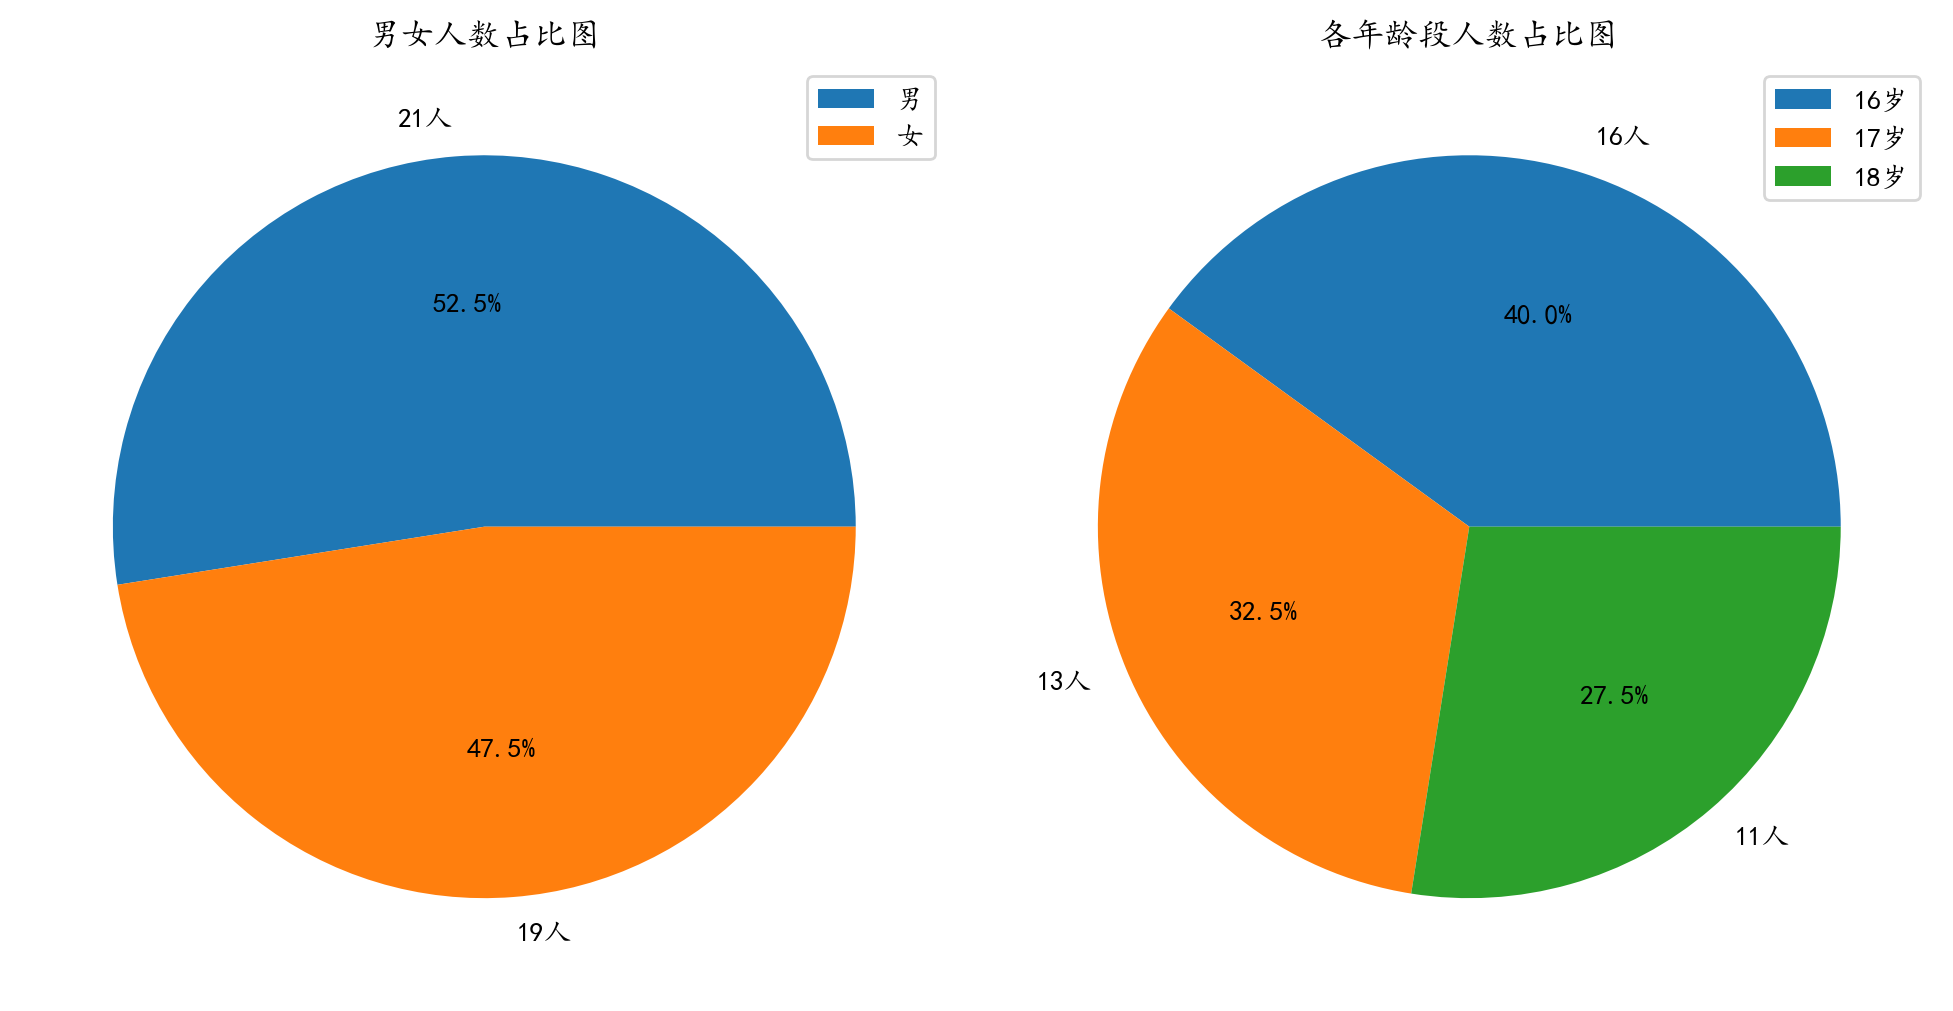

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 子图1：男女人数饼状图
gender_counts = df['性别'].value_counts()
gender_labels = gender_counts.index.tolist()  # 获取性别标签
gender_pcts = [f'{count}人' for count in gender_counts]  # 构造性别人数标签
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=gender_pcts, ax=axes[0])
axes[0].set_title('男女人数占比图')
axes[0].set_ylabel('')

# 子图2：各年龄段人数饼状图
age_counts = df['年龄'].value_counts()
age_labels = age_counts.index.tolist()  # 获取年龄段标签
age_labels.sort()                       # 调整排序，不然出错
age_pcts = [f'{count}人' for count in age_counts]  # 构造年龄段人数标签
age_counts.plot(kind='pie', autopct='%1.1f%%', labels=age_pcts, ax=axes[1])
axes[1].set_title('各年龄段人数占比图')
axes[1].set_ylabel('')

# 添加标签栏
axes[0].legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), labels=gender_labels)
ages_trand_labels = list(map(lambda x: str(x) + '岁', age_labels))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), labels=ages_trand_labels)  # 添加标签注释并命名

plt.tight_layout()  # 调整子图之间的间距
plt.show()

可知在数据集的四十份样本中存在： <br>
1. 22位女性和18位男性。 <br>
2. 样本年龄分布在16至18岁之间，其中16岁有16人，17岁有13人，18岁有11人。 <br>

#### 绘制血红蛋白箱型图

箱型图中箱子的长度和宽度表示了数据集的中间50%值得分布情况，其中，箱子的高度表示分布的范围，而箱子越扁平则说明数据集的方差越小，即数据较为集中，反之则说明数据集的方差越大，即数据更加分散。<br>

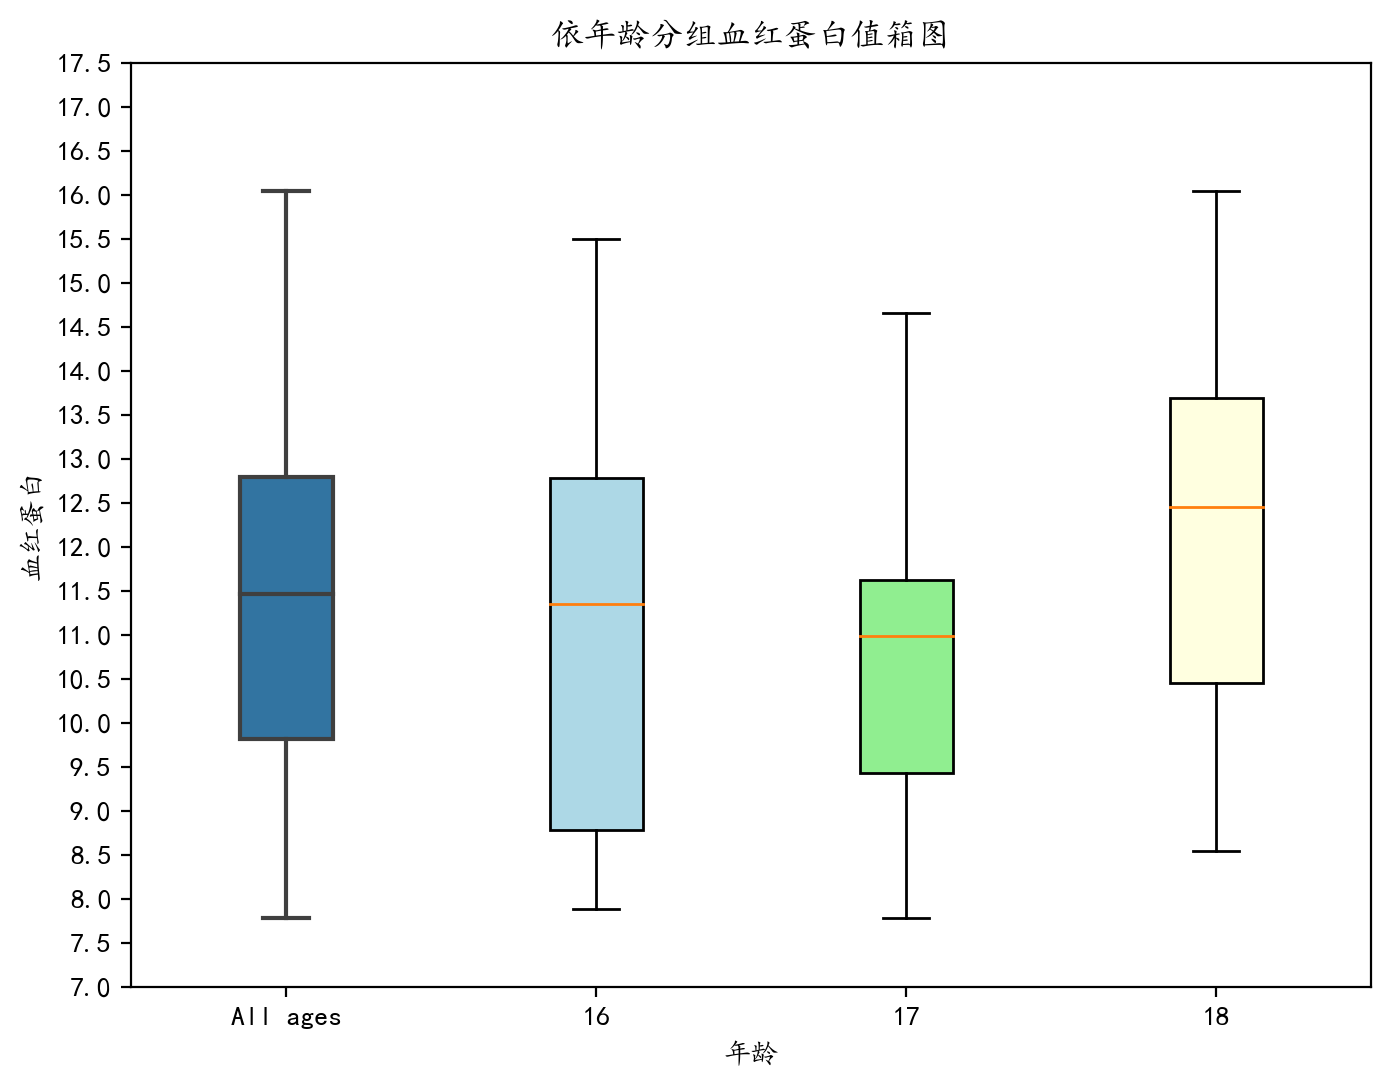

In [166]:
# 创建图表对象
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制全年龄箱线图
sns.boxplot(df['血红蛋白'], orient="v", width=0.3)

# 使用 groupby() 函数将数据按年龄分组，并提取血红蛋白列
grouped_data = df.groupby('年龄')['血红蛋白'].apply(list)

# 设置填充颜色
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(plt.boxplot(grouped_data.values, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

# 修改每一组的下标
ax.set_xticklabels(['All ages'] + list(grouped_data.index))

plt.xlabel('年龄')
plt.ylabel('血红蛋白')
plt.title('依年龄分组血红蛋白值箱图')
plt.yticks(np.arange(7, 18, 0.5))           # 设置纵坐标的刻度范围和精度

# 显示图形
plt.show()

透过上述箱图可以得知：样本数据中年龄为17岁的人群其箱型图的箱体相较于另外两个群体其箱型更加扁平，这也表示其数据的方差最小，数据集中分布在11.5~9.5之间。该年龄段的“血红蛋白”值上限与中位数也是三个年龄段人群中最低的。

由于我们的数据没有出现异常点，所以箱型图的上下限之间的距离就是各组的极差。透过上示图片可知，年龄为17岁的组别极差最小。

#### 绘制年龄与平均血红蛋白值以及性别分组后的年龄与平均血红蛋白值的柱状图

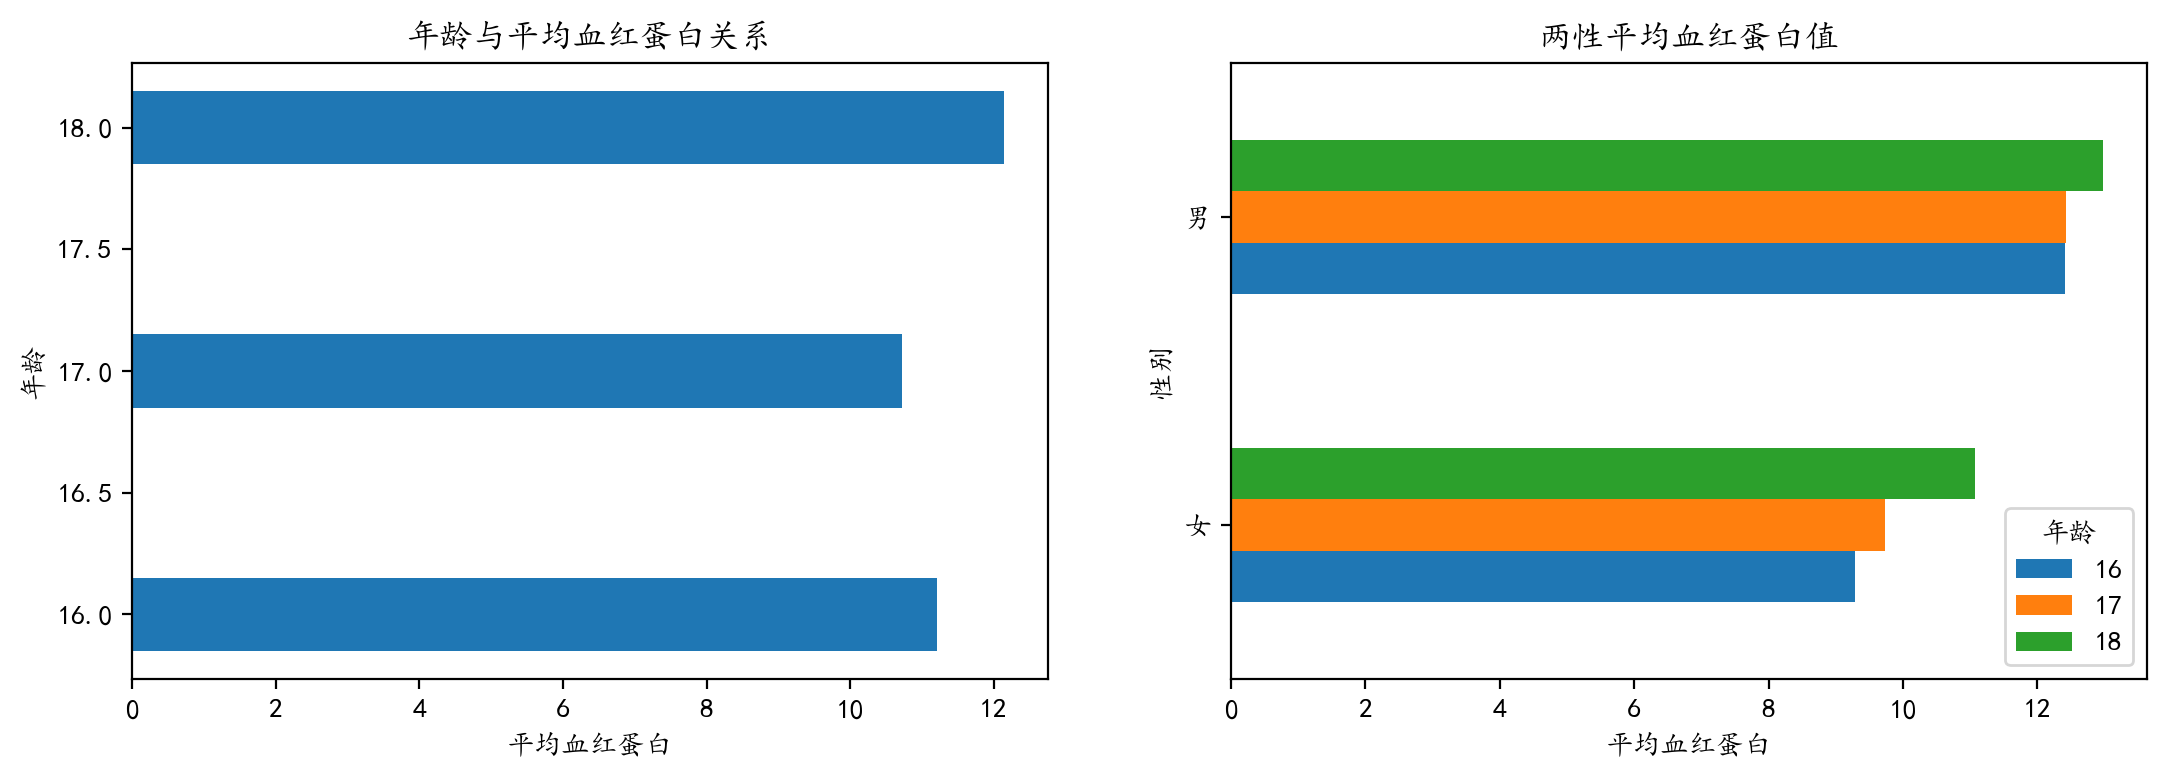

In [167]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
ax=plt.subplot(1,2,1)   #1行2列，并使用第1个位置来绘制第一个子图
# 按年龄分组并计算平均血红蛋白值
grouped_df = df.groupby('年龄')['血红蛋白'].mean()

# 绘制血红蛋白与年龄相关的柱状图
plt.barh(grouped_df.index, grouped_df.values, height=0.3)
plt.ylabel('年龄')
plt.xlabel('平均血红蛋白')
plt.title('年龄与平均血红蛋白关系')

ax=plt.subplot(1,2,2)   #1行2列，并使用第2个位置来绘制第一个子图
# 按性别和年龄分组并计算平均血红蛋白值
grouped_df = df.groupby(['性别', '年龄'])['血红蛋白'].mean()

# 绘制两性平均血红蛋白值的柱状图
grouped_df.unstack().plot(kind='barh', ax=axs[1])
plt.xlabel('平均血红蛋白')
plt.ylabel('性别')
plt.title('两性平均血红蛋白值')
plt.legend(title='年龄')

plt.show()

可知在不区分性别的情况下年龄组为17的组别平均血红蛋白值最低。<br>
可以得出男性各年龄组的平均血红蛋白值均比女性各年龄组高。且女性年各龄组的平均血红蛋白值随年龄增长而下滑，男性各年龄组则呈现近乎相反的势态。

#### 绘制血红蛋白直方图以及血红蛋白值与年龄和性别相关的热力图

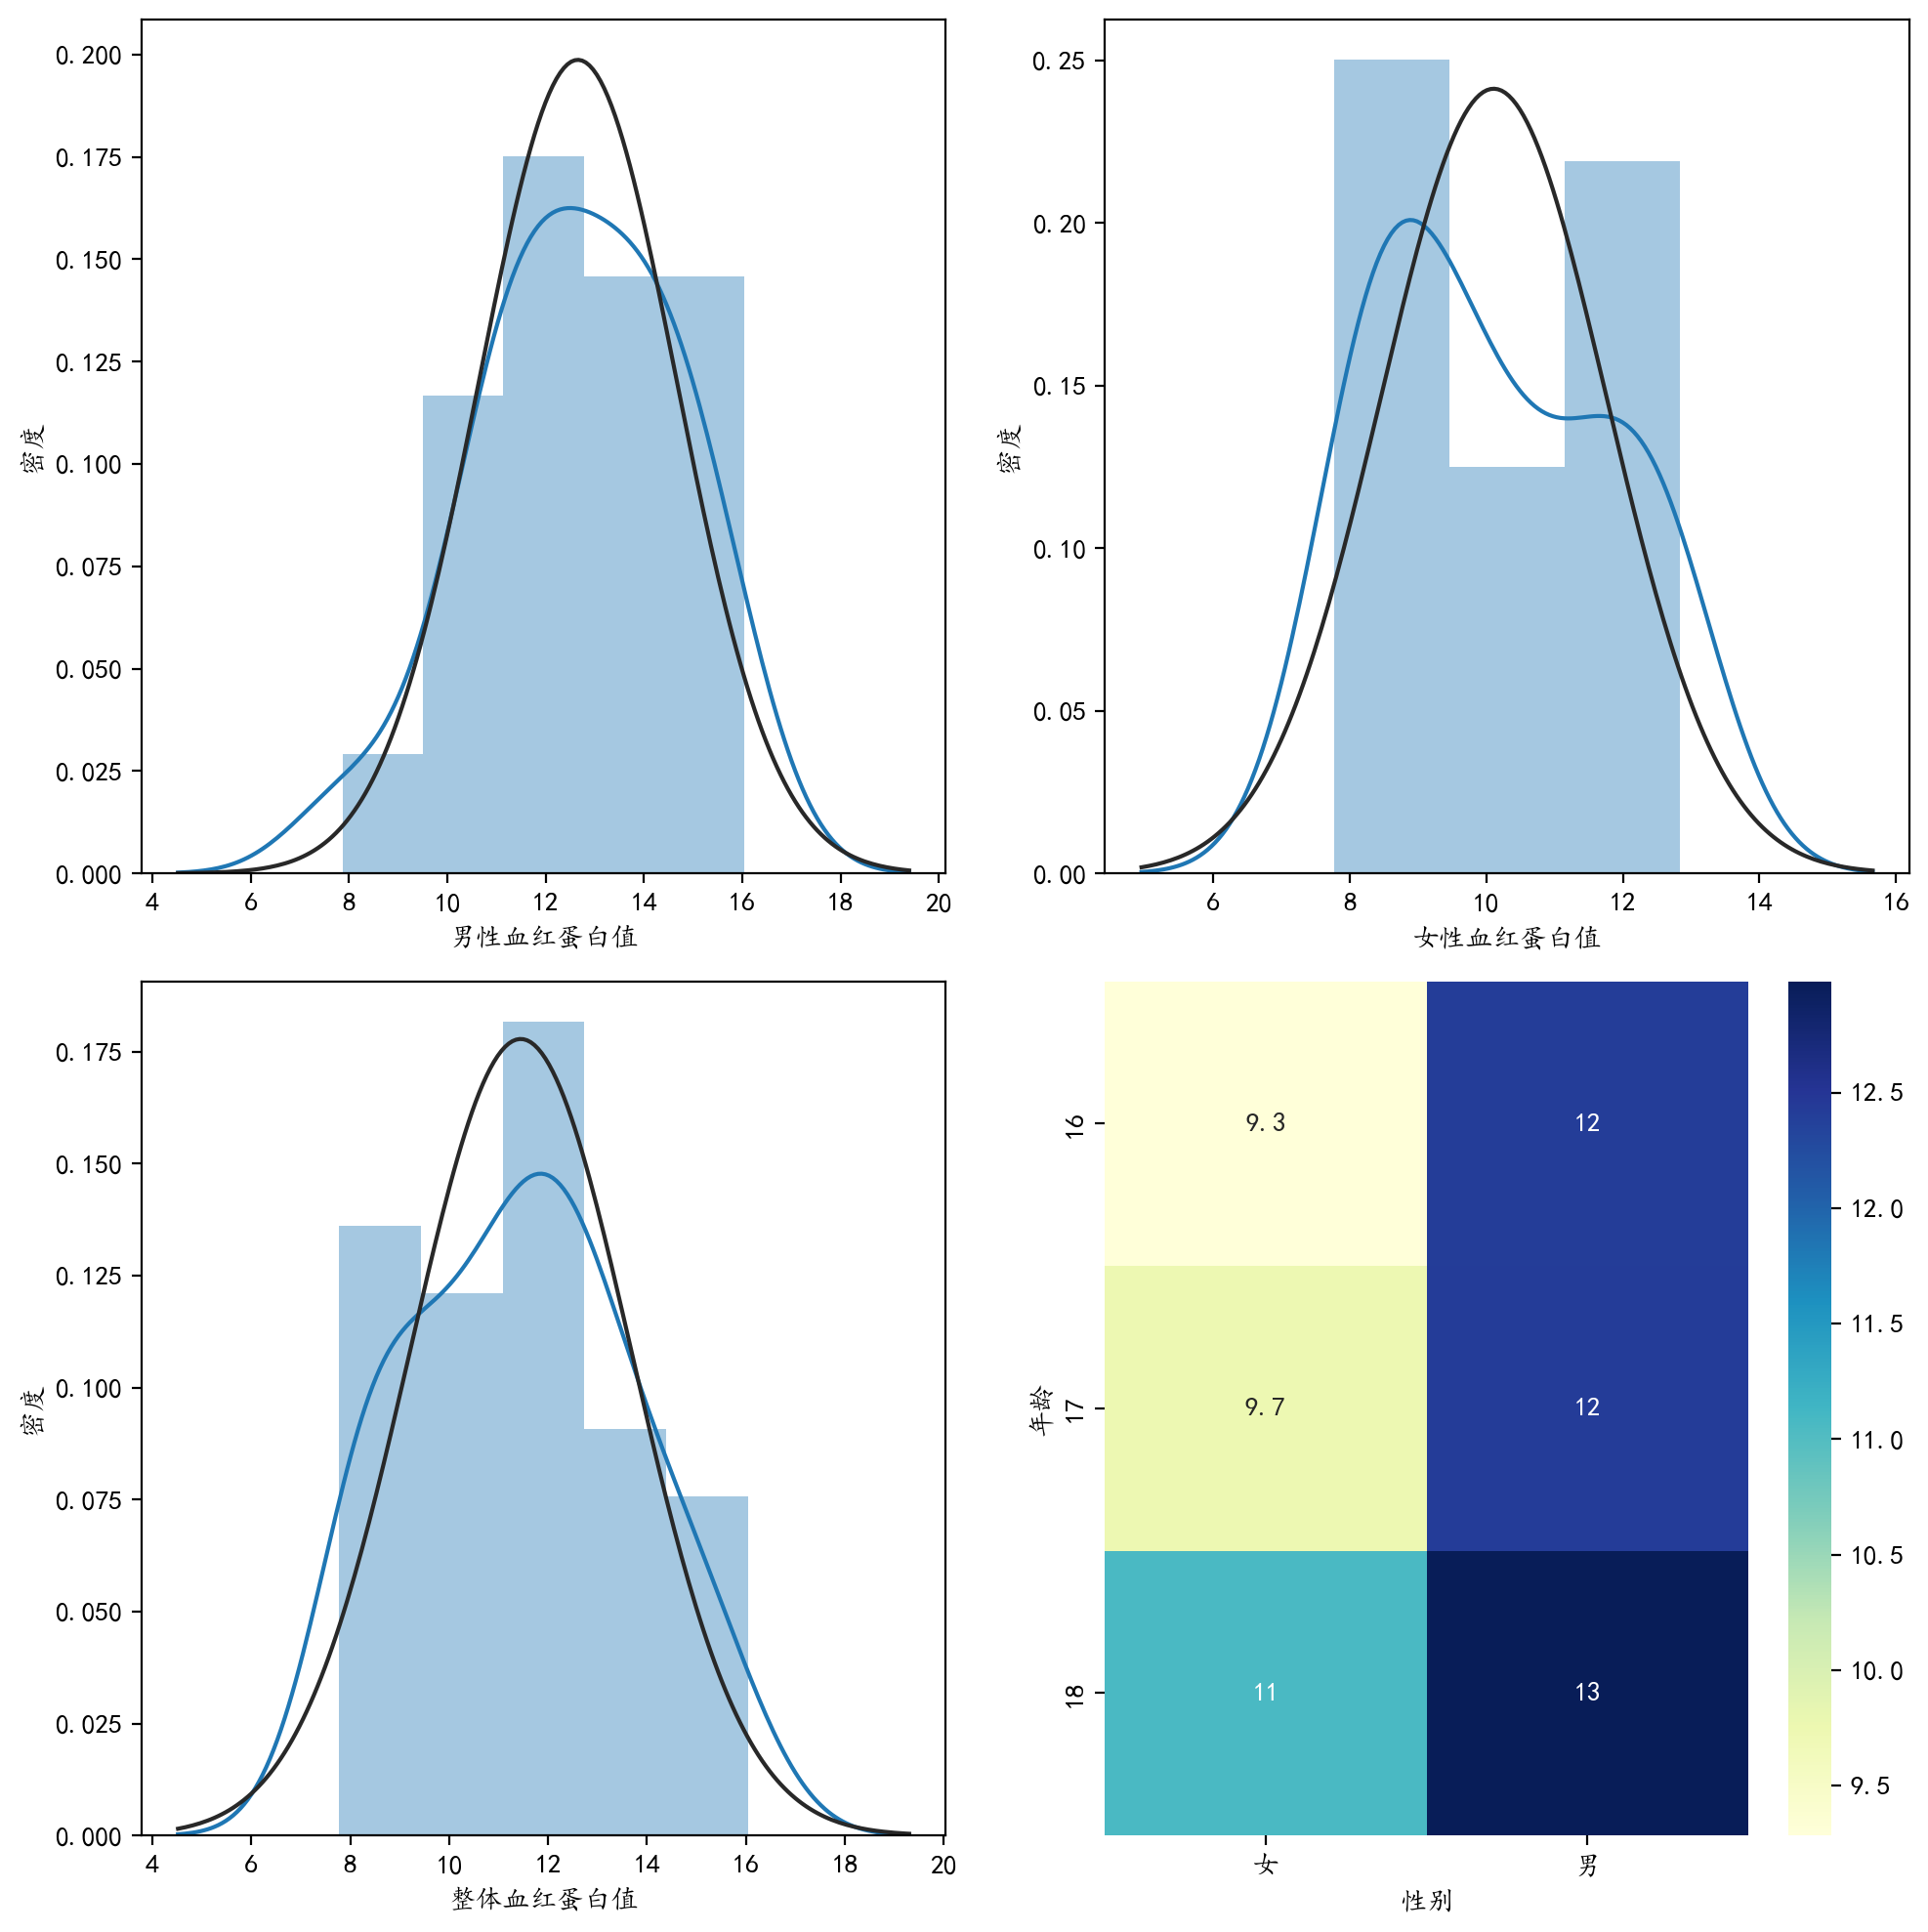

In [168]:
plt.figure(figsize=(10, 10))

# 图1：男性血红蛋白值密度图
ax = plt.subplot(2, 2, 1)
male_hemoglobin = df[df['性别'] == '男']['血红蛋白']
sns.distplot(male_hemoglobin, fit=stats.norm)
plt.ylabel('密度')
plt.xlabel('男性血红蛋白值')

# 图2：女性血红蛋白值密度图
ax = plt.subplot(2, 2, 2)
female_hemoglobin = df[df['性别'] == '女']['血红蛋白']
sns.distplot(female_hemoglobin, fit=stats.norm)
plt.ylabel('密度')
plt.xlabel('女性血红蛋白值')

# 图3：整体血红蛋白值密度图
ax = plt.subplot(2, 2, 3)
hemoglobin = df['血红蛋白']
sns.distplot(hemoglobin, fit=stats.norm)
plt.ylabel('密度')
plt.xlabel('整体血红蛋白值')

# 图4：年龄和性别的血红蛋白值热力图
ax = plt.subplot(2, 2, 4)
df['血红蛋白'] = df['血红蛋白'].astype(float)
pivot_table = df.pivot_table(index='年龄', columns='性别', values='血红蛋白')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

由上示密度图得知，女性样本中血红蛋白位于7.8~9.0之间的人数较多，引起全体样本中血红蛋白值7.8~9.0之间的概率较大，造成了密度概率曲线于此处一明显突起。<br>
由热力图的各区块颜色深浅得知，样本中18岁男性组别其血红蛋白平均值最高，16岁女性组别其平均血红蛋白值最低。虽然在上述的血红蛋白柱状图中也可以看出此信息，但是热力图可以更加清晰直观显示出血红蛋白在不同年龄性别组合下的分布情况。